<a href="https://colab.research.google.com/github/Mondal-Indrani/Diabetes-Prediction-using-Machine-Learning/blob/main/Diabetes_prediction_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Diabetes Prediction using Machine Learning**

Diabetes, is a group of metabolic disorders in which there are high blood sugar levels over a prolonged period. Symptoms of high blood sugar include frequent urination, increased thirst, and increased hunger. If left untreated, diabetes can cause many complications. Acute complications can include diabetic ketoacidosis, hyperosmolar hyperglycemic state, or death. Serious long-term complications include cardiovascular disease, stroke, chronic kidney disease, foot ulcers, and damage to the eyes.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

**Objective**
We will try to build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

**Details about the dataset:**
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

**Pregnancies:** Number of times pregnant

**Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test

**BloodPressure:** Diastolic blood pressure (mm Hg)

**SkinThickness:** Triceps skin fold thickness (mm)

**Insulin:** 2-Hour serum insulin (mu U/ml)

**BMI:** Body mass index (weight in kg/(height in m)^2)

**DiabetesPedigreeFunction:** Diabetes pedigree function

**Age:** Age (years)

**Outcome:** Class variable (0 or 1)

**Number of Observation Units:** 768


### **1) Exploratory Data Analysis**

**Importing required libraries**

In [ ]:
#Logistic Regression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Loading Dataset/ Reading the dataset**

In [ ]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Observation of data**

In [ ]:
#The first 5 observation units of the data set were accessed
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#The size of the data set was examined.It consists of 768 observation units and 9 veriables
data.shape

(768, 9)

**Feature Information**

In [ ]:
#Feature information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Histogram of variable age**

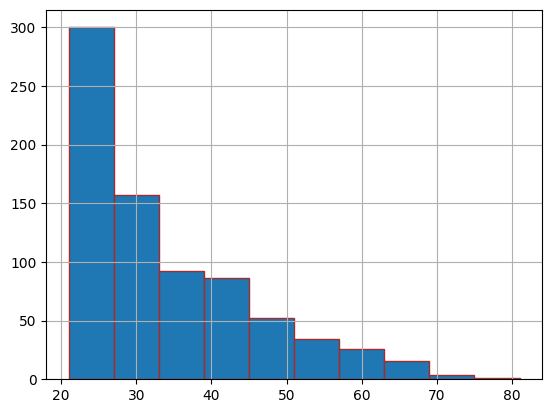

In [ ]:
#The histogram of the Age variable was reached
data["Age"].hist(edgecolor = "brown");

In [ ]:
#check maximum age and minimum age
print("maximum age:",data["Age"].max())
print("minimum age:",data["Age"].min())

maximum age: 81
minimum age: 21


**co-relation matrix (calculate the relationship between each column in your dataset)**

In [ ]:
correlation = data.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


**plot heatmap (show the corelation between the column)**

<Axes: >

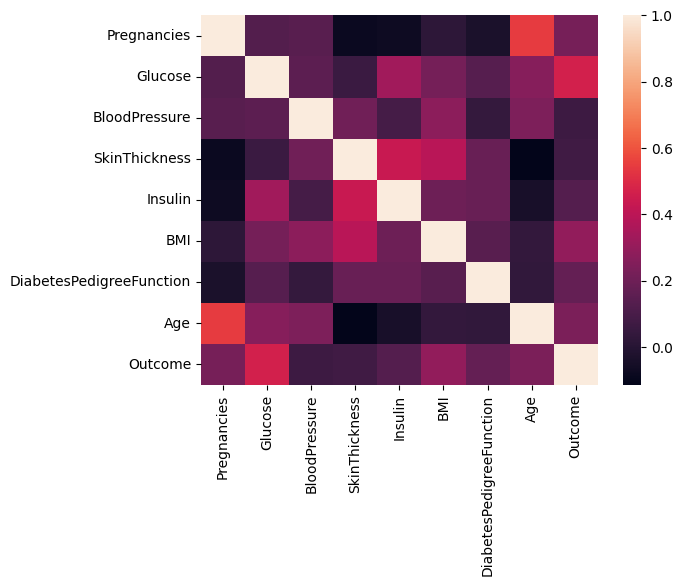

In [ ]:
sns.heatmap(correlation)

### **2) Data Preprocessing**

**We have to check for missing data**

In [ ]:
#look at where are missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

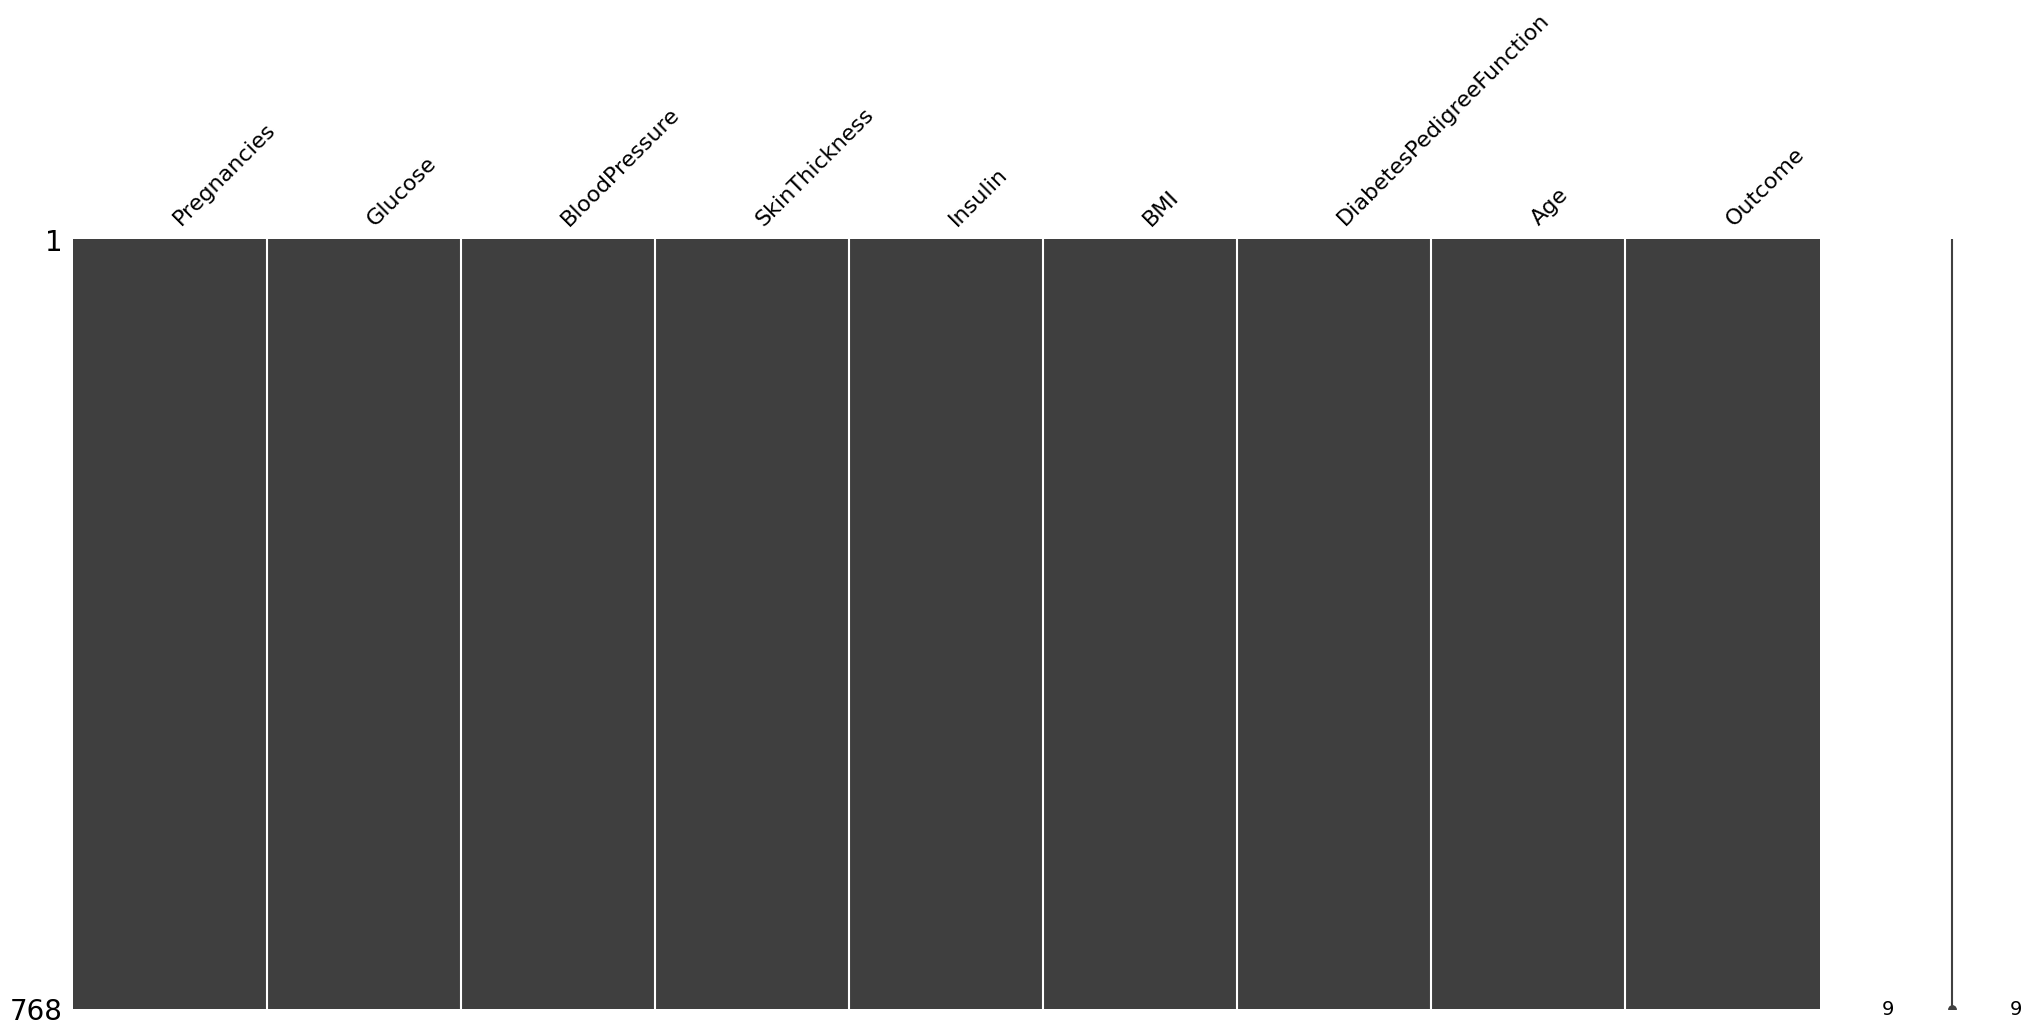

In [ ]:
#visualized using the missingno library for the visualization of missing data
import missingno as msno
msno.matrix(data)

<Axes: >

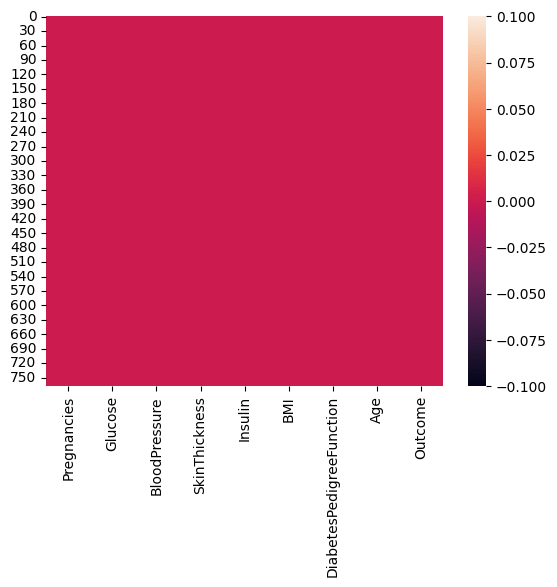

In [ ]:
sns.heatmap(data.isnull())            #check if there is a missing data or not
#data visualization

In [ ]:
 #The missing values ​​will be filled with the median values ​​of each variable.
 data.fillna(data.median(), inplace=True)
 #but here is no missing data so we skip this step

### **3) Fitting Logistic Regression to the training set**

**(i)** here we split  data into the traning data and the testing data and apply the  **binomial logistic regression** technique to train our model.
Here we use linear classifier.

**train text split(split in training set and testing test)**

In [ ]:
X=data.drop('Outcome',axis=1)
y=data['Outcome']
print(X)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
325,1,157,72,21,168,25.6,0.123,24
243,6,119,50,22,176,27.1,1.318,33
667,10,111,70,27,0,27.5,0.141,40
322,0,124,70,20,0,27.4,0.254,36
261,3,141,0,0,0,30.0,0.761,27
...,...,...,...,...,...,...,...,...
311,0,106,70,37,148,39.4,0.605,22
102,0,125,96,0,0,22.5,0.262,21
279,2,108,62,10,278,25.3,0.881,22
231,6,134,80,37,370,46.2,0.238,46


Here ,we are taking 80% of data as a training data set and 20% of data as a testing
 data set

In [ ]:
y_train

,Outcome
163,0
527,0
638,1
367,0
599,0
...,...
627,0
578,0
220,1
324,0


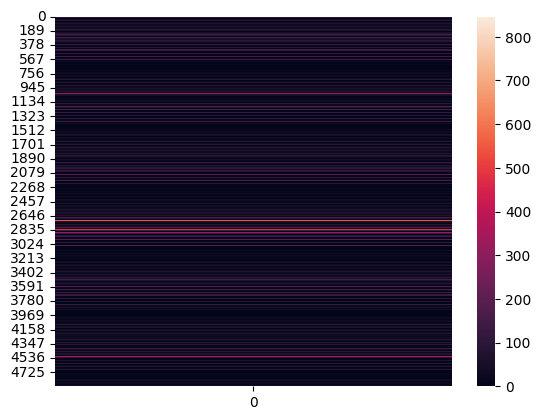

In [ ]:
X_train_reshaped = X_train.values.reshape(-1, 1)   #covert into 2d array
# Plot the heatmap
sns.heatmap(X_train_reshaped)
plt.show()

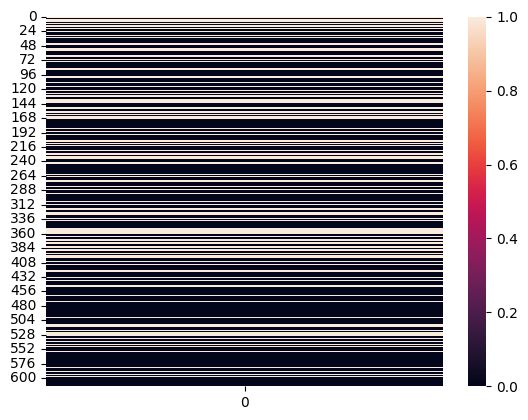

In [ ]:
y_train_reshaped = y_train.values.reshape(-1, 1)   #covert into 2d array
# Plot the heatmap
sns.heatmap(y_train_reshaped)
plt.show()

**Train the model**

In [ ]:
model=LogisticRegression()      #apply logistic regression technique
model.fit(X_train,y_train)      #train the model (we apply the necessary formula)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### **4)Predicting the test result**

**Making prediction**

In [ ]:
predictions=model.predict(X_test)           #use for prediction/used in Linear Regression,RandomForest Regression
predictions

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

### **5)Test Accuracy of the result**

**Evalution/accuracy**

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7792207792207793


**confusion matrix**

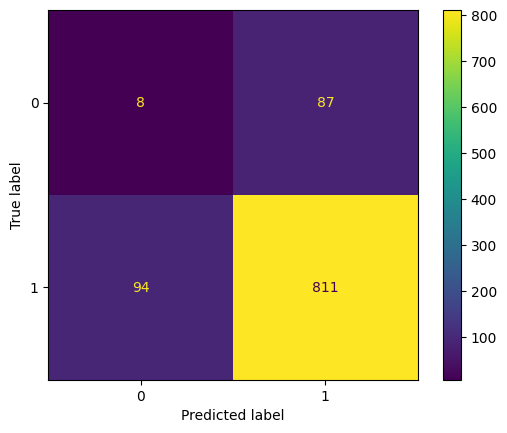

In [ ]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

# Create a logistic regression model
# Now you can use logreg in cross_val_score
logreg = LogisticRegression(max_iter=1000)  # Increase max_iter
logreg_cv = np.mean(cross_val_score(logreg, X_train, y_train, cv=10) * 100)
print("Cross-Validation score for Logistic Regression fit in Regular Training Set:", logreg_cv)

Cross-Validation score for Logistic Regression fit in Regular Training Set: 77.2104706504495


The results of cross-validation for logistic regression is good, which proves that the accuracy score got previously for this model is not pure luck.

## **Gaussian Naive Bayes**
Build/Train the Model

In [ ]:
### Instantiate the Algorithm
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
### Train the model
gnb.fit(X_train, y_train)

GaussianNB()

Validate the Model/prediction

In [ ]:
### Predict on the Test Set
gnb_pred = gnb.predict(X_test)
gnb_pred

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

Accuracy

In [ ]:
accuracy = accuracy_score(y_test, gnb_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7337662337662337


This Naive Bayes model got a decent accuracy score but not as good as the previous model.

confusion matrix

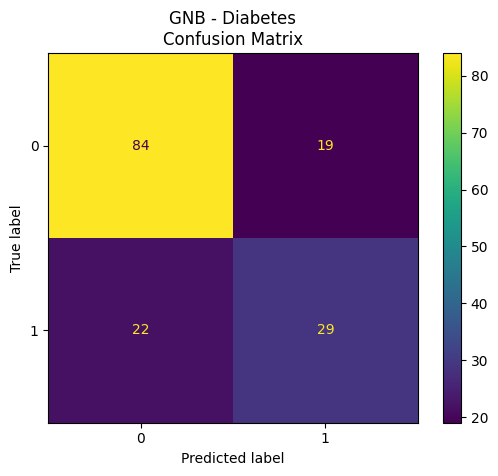

In [ ]:
### Plot the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def confmatrix(y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    disp.ax_.set_title(title)
    plt.show()
confmatrix(gnb_pred, "GNB - Diabetes\nConfusion Matrix")

**Cross-Validation**

In [ ]:
gnb_cv = np.mean(cross_val_score(gnb, X_train, y_train, cv=10) * 100)
print("Cross-Validation score for Naive Bayes in Regular Training Set:", gnb_cv)

Cross-Validation score for Naive Bayes in Regular Training Set: 74.90216816499206


### **Random Forest Classifier**
Build/Train the Model

In [ ]:
### Instantiate algorithm
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
### Fit the model to the data
rf.fit(X_train, y_train)

RandomForestClassifier()

Validate the Model

In [ ]:
### Predict on the test set (prediction)
rf_pred = rf.predict(X_test)
rf_pred

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

accuracy

In [ ]:
accuracy = accuracy_score(y_test, rf_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7207792207792207


This Random Forest model got a decent accuracy score but not as good as the previous model.

confusion matrix

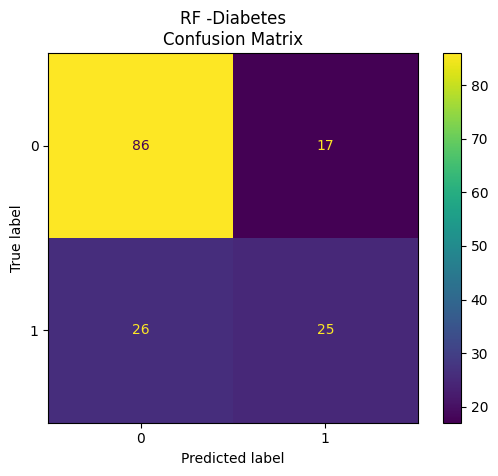

In [ ]:
### Plot the confusion matrix
confmatrix(rf_pred, "RF -Diabetes\nConfusion Matrix")

Cross-Validation

In [ ]:
### Perform cross-validation then get the mean
rf_cv = np.mean(cross_val_score(rf, X_train, y_train, cv=10) * 100)
print("Cross-Validation score for Random forest:", rf_cv)

Cross-Validation score for Random forest: 77.5171866737176


This Random forest model got a decent cross-vallidation score but not as good as the previous models.This also has the lowest recall score.

### **Summary of the Results**

In [ ]:
log_predictions=model.predict(X_test)
logreg_score= accuracy_score(y_test, log_predictions)
logreg_cv = np.mean(cross_val_score(logreg, X_test, y_test, cv=10) * 100)

gnb_pred = gnb.predict(X_test)
gnb_score = accuracy_score(y_test, gnb_pred)
gnb_cv = np.mean(cross_val_score(gnb, X_test, y_test, cv=10) * 100)

rf_pred = rf.predict(X_test)
rf_score = accuracy_score(y_test, rf_pred)

df_results = pd.DataFrame.from_dict({
    'Accuracy Score':{'Logistic Regression':logreg_score, 'Gaussian Naive Bayes':gnb_score, 'Random Forest':rf_score},
    'Cross-Validation Score':{'Logistic Regression':logreg_cv, 'Gaussian Naive Bayes':gnb_cv, 'Random Forest':rf_cv}
    })
df_results

,Accuracy Score,Cross-Validation Score
Logistic Regression,0.779221,74.583333
Gaussian Naive Bayes,0.733766,71.291667
Random Forest,0.720779,77.517187


We got good accuracy scores from all of the models, but not that good precision and recall for classifying people with diabetes.Also, there may be other predictors for diabetes that are not included in this dataset.

**Logistic Regression shows more promise.** This model does not only have the highest accuracy score and cross-validation score, it also has good precision of 83.3%. The f1-score of this model is 66.67%.

While, Naive Bayes has 80% recall which is better compared to the other models.

Overall, it looks like we have a solid understanding of the strengths and limitations of the models. Adjustments and further experiments can help improve performance based on specific goals.

